In [26]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

#Ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Set display options
pd.set_option('display.max_rows', None)

In [27]:
#Getting the dataset
mnist = fetch_openml('mnist_784')

In [28]:
#Checking for the shape of the dataset
print(mnist.data.shape)

(70000, 784)


In [29]:
#Getting more information about the database
dir(mnist)

['DESCR',
 'categories',
 'data',
 'details',
 'feature_names',
 'frame',
 'target',
 'target_names',
 'url']

In [30]:
#Spliting the dataset into train and test data
X_train, y_train = mnist.data[:60000], mnist.target[:60000]
print(X_train.shape) #First 60,000 instance

X_test, y_test = mnist.data[60000:], mnist.target[60000:]
print(X_test.shape) #Remaining 10,000 instances

(60000, 784)
(10000, 784)


In [31]:
#Printing the first 5 rows of the dataset
X_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
# Printing the first instance of the dataset
X_train.iloc[0]

pixel1        0.0
pixel2        0.0
pixel3        0.0
pixel4        0.0
pixel5        0.0
pixel6        0.0
pixel7        0.0
pixel8        0.0
pixel9        0.0
pixel10       0.0
pixel11       0.0
pixel12       0.0
pixel13       0.0
pixel14       0.0
pixel15       0.0
pixel16       0.0
pixel17       0.0
pixel18       0.0
pixel19       0.0
pixel20       0.0
pixel21       0.0
pixel22       0.0
pixel23       0.0
pixel24       0.0
pixel25       0.0
pixel26       0.0
pixel27       0.0
pixel28       0.0
pixel29       0.0
pixel30       0.0
pixel31       0.0
pixel32       0.0
pixel33       0.0
pixel34       0.0
pixel35       0.0
pixel36       0.0
pixel37       0.0
pixel38       0.0
pixel39       0.0
pixel40       0.0
pixel41       0.0
pixel42       0.0
pixel43       0.0
pixel44       0.0
pixel45       0.0
pixel46       0.0
pixel47       0.0
pixel48       0.0
pixel49       0.0
pixel50       0.0
pixel51       0.0
pixel52       0.0
pixel53       0.0
pixel54       0.0
pixel55       0.0
pixel56   

In [33]:
# Reshaping the first instance of the dataset
img1 = X_train.iloc[0].values.reshape(28,28)

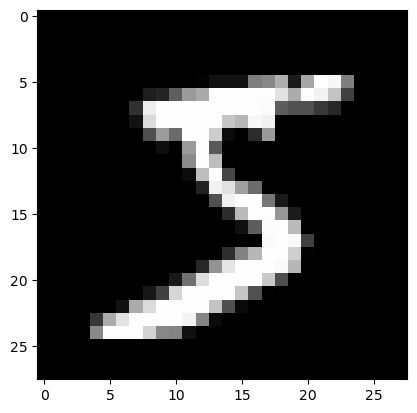

In [34]:
# Plotting the first instance of the dataset
plt.imshow(img1, cmap="gray")
plt.show()

In [35]:
#Getting the unique values
unique = y_train.unique()
print(unique)

['5', '0', '4', '1', '9', '2', '3', '6', '7', '8']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']


First 20 elements of the original dataset: 


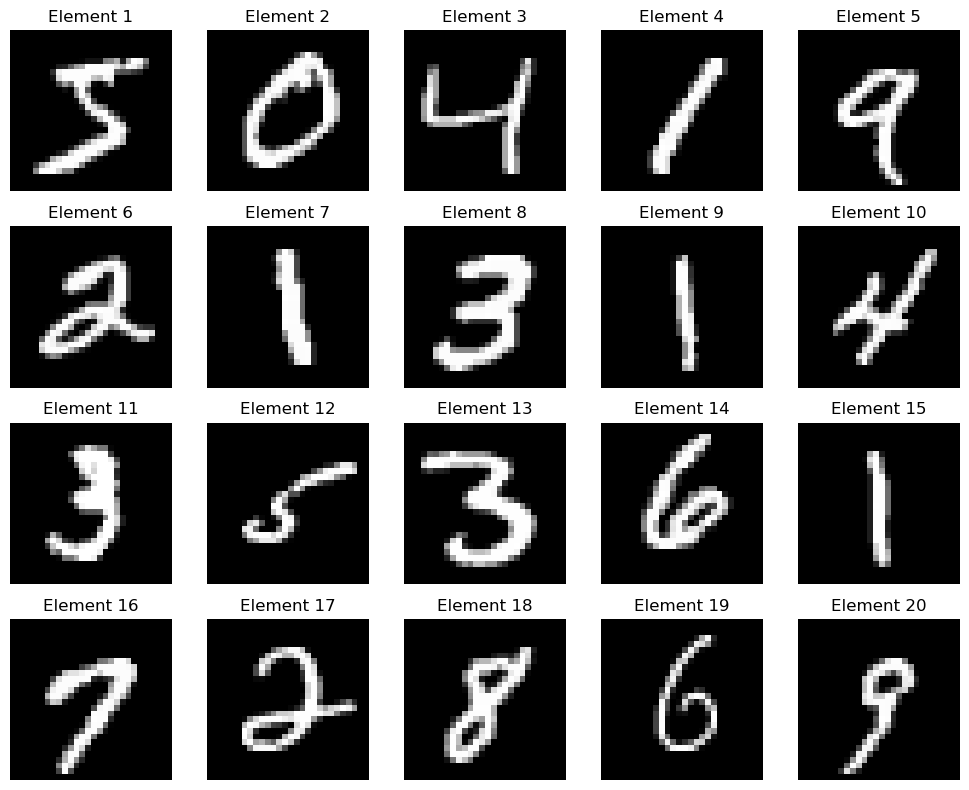

In [36]:
#Printing at least one instance of each digit

# Getting the first 20 elements from X_train
first_20_elements = X_train.iloc[:20]

# Creating a figure to plot multiple images
fig, axes = plt.subplots(4, 5, figsize=(10, 8))  # Creating a 4x5 grid of subplots

# Looping through the first 20 elements and plot them
print("First 20 elements of the original dataset: ")
for i, ax in enumerate(axes.ravel()):
    ax.imshow(first_20_elements.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Element {i + 1}")

plt.tight_layout()
plt.show()


In [37]:
#Creating the PCA model
pca = PCA(n_components=2)

In [38]:
#Fit and transforming the training data
X_pca = pca.fit_transform(X_train)


In [39]:
# Getting the explained variance ratios for the first and second components
explained_variance_ratio = pca.explained_variance_ratio_

# Printing the explained variance ratios
print(explained_variance_ratio)

#Print the explained variance ratio for the first and second components
print("Explained Variance Ratio for 1st Principal Component:", explained_variance_ratio[0])
print("Explained Variance Ratio for 2nd Principal Component:", explained_variance_ratio[1])

[0.09704664 0.07095924]
Explained Variance Ratio for 1st Principal Component: 0.09704664359647137
Explained Variance Ratio for 2nd Principal Component: 0.07095924057945624


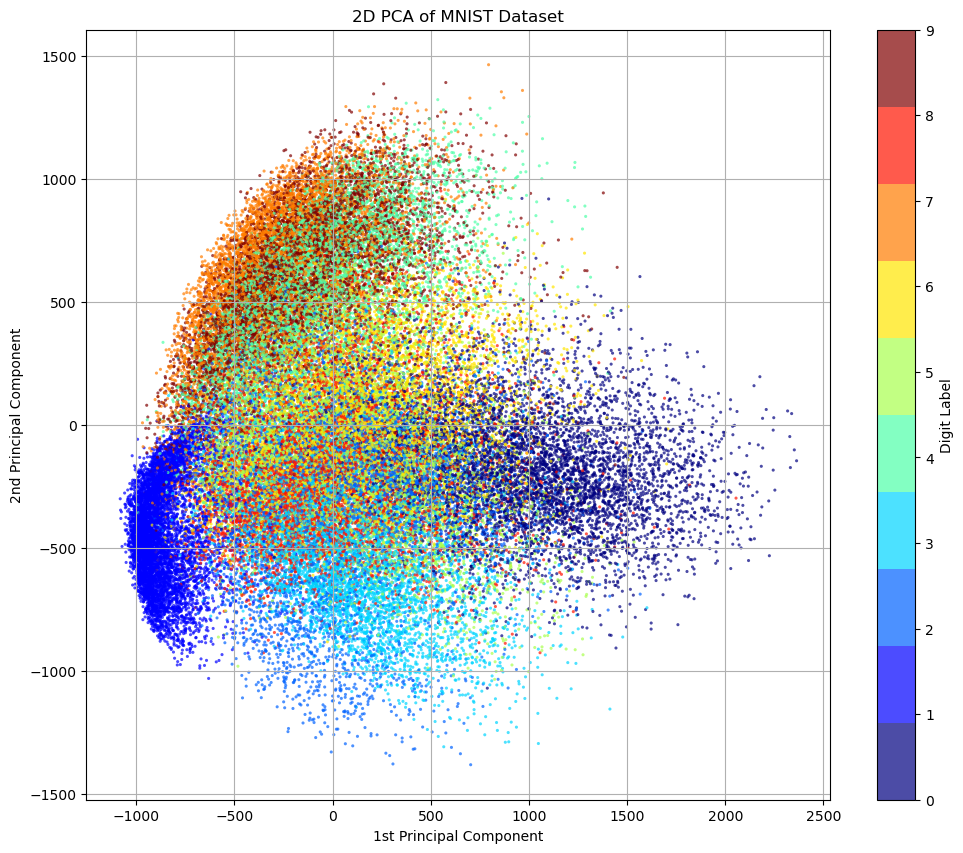

In [40]:
# Plotting the projections of the 1st and 2nd principal component onto a 2D hyperplane
plt.figure(figsize=(12,10))

# Using a scatter plot and coloring points based on their true label
# PS converted y_train values from string to integer for coloring
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train.astype(int), edgecolor='none', alpha=0.7, 
            cmap=plt.cm.get_cmap('jet', 10), s=5)

plt.colorbar(label='Digit Label')
plt.xlabel('1st Principal Component')
plt.ylabel('2nd Principal Component')
plt.title('2D PCA of MNIST Dataset')
plt.grid(True)
plt.show()


In [41]:
#Now, using incremental PCA to reduce the dimensionality of the dataset to 154 dimensions

inc_pca = IncrementalPCA(n_components=154)
X_reduced = inc_pca.fit_transform(X_train)
X_recovered = inc_pca.inverse_transform(X_reduced)

Original 20 elements of the dataset:


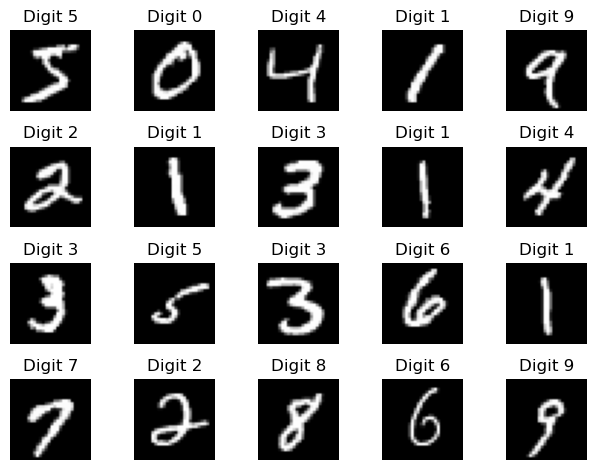

Compressed 20 elements after PCA:


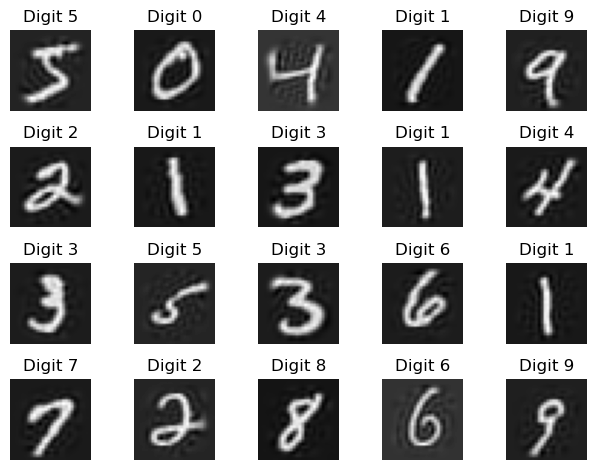

In [42]:
# Printing the original and the compressed 20 elements from the 154 dimension digits

#Original dataset
print("Original 20 elements of the dataset:")
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_train.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.title(f"Digit {y_train[i]}")

plt.tight_layout()
plt.show()

#Compressed dataset
print("Compressed 20 elements after PCA:")
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.imshow(X_recovered[i].reshape(28, 28), cmap='gray')  
    plt.axis('off')
    plt.title(f"Digit {y_train[i]}")

plt.tight_layout()
plt.show()